# H&M Recommendation - Majority Voting Ensemble

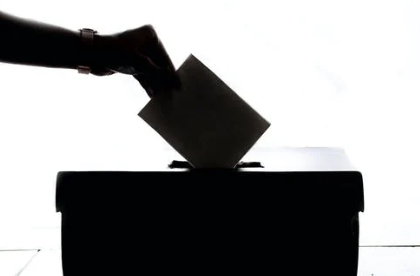


Thank you for your checking this notebook.

This is my notebook for "H&M Personalized Fashion Recommendations" competition [(Link)](https://www.kaggle.com/c/h-and-m-personalized-fashion-recommendations/overview).

The end of competition is approaching now and would like to share one way of ensemble "Majority Voting" to improve our score as much as possible in the last minutes.

If you think this notebook is interesting for you, please leave your comment or question and I appreciate your upvote as well. :) 

<a id='top'></a>
## Contents
1. [Import Library & Set Config](#config)
2. [Load Data](#load)
3. [Prepare Data & Submission](#prepare)
6. [Conclution](#conclution)
7. [Reference](#ref)

<a id='config'></a>

---
## 1. Import Library & Set Config
---

[Back to Contents](#top)

In [ ]:
# === General ===
import sys, warnings, time, os, copy, gc, re, random, pickle, cudf
warnings.filterwarnings('ignore')
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# pd.set_option('display.max_rows', 50)
# pd.set_option('display.max_columns', None)
# pd.set_option("display.max_colwidth", 10000)
import seaborn as sns
sns.set()
from pandas.io.json import json_normalize
from pprint import pprint
from pathlib import Path
from tqdm import tqdm
tqdm.pandas()
from collections import Counter

In [ ]:
DEBUG = False

<a id='load'></a>

---
## 2. Load Data

In this notebook, I try to ensemble 5 submittion files from notebooks below. 
One is mine and others are published. Please check and upvote them too.

1. [H&M EDA & Rule Base by Customer Age](https://www.kaggle.com/code/hechtjp/h-m-eda-rule-base-by-customer-age)
2. [H&M : Framework for Partitioned Validation](https://www.kaggle.com/code/negoto/h-m-framework-for-partitioned-validation)
3. [Trending](https://www.kaggle.com/code/ebn7amdi/trending)
4. [[LB 0.0236] Ensemble gives you Bronze medal](https://www.kaggle.com/code/jaloeffe92/lb-0-0236-ensemble-gives-you-bronze-medal)
5. [H&M Ensembling - with LSTM be7226](https://www.kaggle.com/code/qianyetang/h-m-ensembling-with-lstm-be7226)

---

[Back to Contents](#top)

In [ ]:
def display_df(df, head=3):
    print(f'The shape of df is {df.shape}.\n')
    display(df.head(head))

In [ ]:
dfSub1 = cudf.read_csv('../input/h-m-eda-rule-base-by-customer-age/submission.csv')
display_df(dfSub1, head=3)

In [ ]:
dfSub2 = cudf.read_csv('../input/h-m-framework-for-partitioned-validation/submission.csv')
display_df(dfSub2, head=3)

In [ ]:
dfSub3 = cudf.read_csv('../input/trending/submission.csv')
display_df(dfSub3, head=3)

In [ ]:
dfSub4 = cudf.read_csv('../input/lb-0-0236-ensemble-gives-you-bronze-medal/submission.csv')
display_df(dfSub4, head=3)

In [ ]:
dfSub5 = cudf.read_csv('../input/h-m-ensembling-with-lstm-be7226/submission.csv')
display_df(dfSub5, head=3)

In [ ]:
dfSub1.columns = ['customer_id', 'prediction1']
dfSub2.columns = ['customer_id', 'prediction2']
dfSub3.columns = ['customer_id', 'prediction3']
dfSub4.columns = ['customer_id', 'prediction4']
dfSub5.columns = ['customer_id', 'prediction5']

<a id='prepare'></a>

---
## 3. Check top 12 articles whih are the most voted & create submission file.
- Using "Counter" to count how many times each articles appeared and select top 12 ones.

---

[Back to Contents](#top)

In [ ]:
dfSub = dfSub1.merge(dfSub2, on='customer_id', how='left')
dfSub = dfSub.merge(dfSub3, on='customer_id', how='left')
dfSub = dfSub.merge(dfSub4, on='customer_id', how='left')
dfSub = dfSub.merge(dfSub5, on='customer_id', how='left')
display_df(dfSub, head=3)

In [ ]:
if DEBUG:
    dfSub = dfSub.sample(frac=0.001, random_state=7)

In [ ]:
def select_topn(x, n=12):
    listX = str(x).split()
    c = Counter(listX)
    values, counts = zip(*c.most_common(n))
    listY = ' '.join(values)
    return listY    

In [ ]:
dfSub['pred_sum'] = dfSub['prediction1'] + ' ' + dfSub['prediction2'] + ' ' + dfSub['prediction3'] + ' ' + dfSub['prediction4'] + ' ' + dfSub['prediction5']

dfSub = dfSub.to_pandas()

dfSub['pred_top12'] = dfSub['pred_sum'].progress_apply(select_topn)

display_df(dfSub, head=3)

In [ ]:
print(dfSub['prediction1'][248891])
print('')
print(dfSub['prediction2'][248891])
print('')
print(dfSub['prediction3'][248891])
print('')
print(dfSub['prediction4'][248891])
print('')
print(dfSub['prediction5'][248891])
print('')
print(dfSub['pred_sum'][248891])
print('')
print(dfSub['pred_top12'][248891])

In [ ]:
dfSampleSub = dfSub[['customer_id', 'pred_top12']]
display_df(dfSampleSub, head=3)

In [ ]:
dfSampleSub.columns = ['customer_id', 'prediction']

dfSampleSub.to_csv(f'submission.csv', index=False)
print(f'Saved submission.csv.')

In [ ]:
dfCheck = cudf.read_csv('./submission.csv')
display_df(dfCheck, head=3)

<a id='conclution'></a>

---

## 4. Conclution

This is the most simple way of ensemble and there are a lot of other way to do that.

If you have any proposal or advice for me, please feel free to leave the comment!

Thank you for your reading through this Notebook!

If you think this notebook is interesting for you, please do click upvote :)

---

[Back to Contents](#top)

<a id='ref'></a>

---
## 5. Reference

1. [H&M: Faster Trending Products Weekly](https://www.kaggle.com/hervind/h-m-faster-trending-products-weekly)
2. [Trending](https://www.kaggle.com/hechtjp/trending?scriptVersionId=89904417)

---

[Back to Contents](#top)